# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-xUFyFbhYziWBKAaI7kNRqF&si=EylYvoWCWMhcvHNK >}}

> 지금까지 했던 내용 추가해설.

# 2. 타이타닉 데이터에 대한 이해

ref: <https://guebin.github.io/STBDA2023/posts/01wk-002.html>

`-` 두 변수 `sibsp`와 `parch`를 합쳐 `family_size`라는 하나의 변수를 만들고, 이를 활용하여 `y`를 예측할 수 있다.

::: {.callout-important}
## 다중공선성

`sibsp` 와 `parch` 를 더하여 새로운 변수를 만든다면, 이후에는 `sibsp`와 `parch` 둘중 하나를 제거하나 둘다 제거하는 방법을 고려해야 한다.
:::

`-` embarked와 class에 대한 피처엔지니어링 아이디어

embarked와 calss를 독립적으로 생각하는 것보다 둘을 합친 변수가 훨씬 유의미할 수 있을 수 있겠다는 아이디어. (경우에 따라 특정 국적의 1등급 손님이 구명보트를 많이 얻었을 수도 있으니까) --> 쉽게말해 교호작용을 고려한다는 얘기.

::: {.callout-important}
## 교호작용

- 그냥 교호작용 고려한다는 소리죠? –> 트리계열은 결과가 크게 좋아질 것이라 기대하기 어렵겠고, 선형모형계열로 적합한다면 결과가 좋아질 수도 있겠음.

- 선형모델을 적합하는 상황을 가정하자. 교호작용의 효과가 있는 자료에서, 이를 무시하고 적합한다면 (“embarked” 변수와 “pclass” 변수만 넣고 적합한다면) 언더핏이 생김.
:::

# 3. 아이스크림/회귀분석

ref: <https://guebin.github.io/STBDA2023/posts/03wk-009.html>

::: {.callout-important}
## 오버피팅

오버피팅: 랜덤으로 뭐가 나올지 맞춘다는 것은 오차항을 적합하겠다는 의미임.
:::

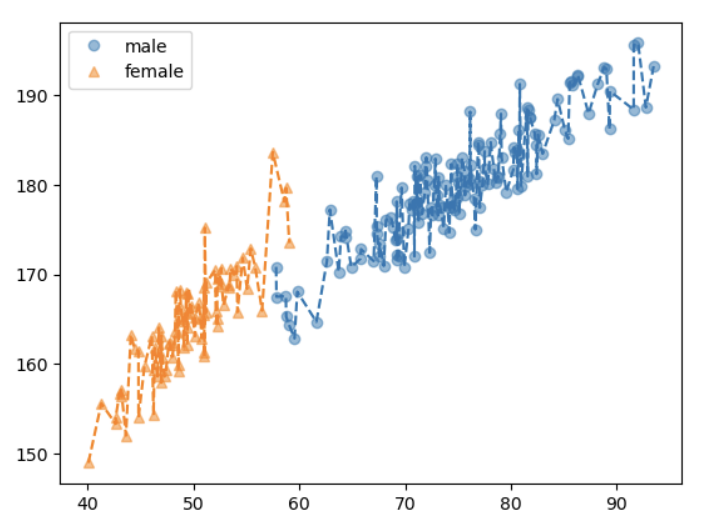

오차항을 적합하는 것은 오버피팅. 적합된 것을 보고 적당 선에서 잘 끊어야 한다.

# 4. 타이타닉/로지스틱

ref: <https://guebin.github.io/STBDA2023/posts/03wk-013.html>

엄청 많은 범주가 있는 변수를 원핫인코딩 하게 되면 열이 엄청나게 많아지게 된다. 이러한 열들은 당연히 y와 직접적인 상관관계는 없게 나올것이다. 즉, 쓸모없는 변수들이 많아지는 상황이 되는데 이는 `모듈21`에서 소개한 변수들을 증가시킨 예제와 비슷한 상황이다.

# 5. 취업(다중공선성) / 다중공선성의 개념

::: {.callout-important}

## 오버피팅에 대한 내 개념

`Predictor` 가 언더라잉이 아니라 오차항을 적합하고 있는 상황.

- 규칙을 찾으면 안될 것 -- 오차항
- 규칙을 찾고 있음 -- 오차항을 적합하고 있음.
:::

`-` 쓸모없는 변수란 느낌이 드는 경우?

- 경우1: 진짜 쓸모없는 거.. (X1=부먹/찍먹, X2=민초/민초X) $\to$ 애초에 `X1`,`X2`를 보고 y를 맞출 생각이 들지 않아.
- 경우2: 실제론 쓸모있는데, 대체자가 있는 경우. (X1=toeic, X2=유사toeic) $\to$ `X1`을 보고 `y`를 맞출 것 같은 생각이 들어, 그리고 `X2`를 보고 `y`를 맞출 것 같은 생각도 들어. 그런데 `X1`이랑 `X2`는 너무 비슷해.

::: {.callout-important}
## 경우 1,2에 대한 추가설명

- 경우1,2는 모듈28에서 소개한 것 처럼 히트맵을 그려서 파악할 수 있다.
- 경우1은 corr(y,X1), corr(y,X2) 의 값이 낮게 나온다.
- 경우2는 corr(y,X1), corr(y,X2) 의 값이 높게 나온다. 하지만 corr(X1,X2)의 값도 높게 나온다.
:::

# 6. 체중감량(교호작용) / 회귀분석

ref: <https://guebin.github.io/STBDA2023/posts/07wk-029.html>

만약에 운동을 안하고, 약만먹을 경우 부작용이 생긴다면? (이것도 교호작용의 일종)

- 이러한 경우 위의 모형으로 단순적합하기 어렵다. (위의 모형은 "운동O/약O"인 case에서 발생하는 효과만 고려되도록 설계되어 있음.)
- 따라서 이럴 경우 차라리 (운동, 약)을 결합하여 새로운 범주형 변수를 만들고, 그 변수에서 원핫인코딩을 하는게 좋다. (마지막 더미변수는 제외하는 것이 좋지만, 파이썬에서는 제외하지 않아도 큰일나는 것은 아님.)
- 사실 (운동, 약)을 결합하여 모든 새로운 범주를 만들고 이 중 필요없는 범주를 또 다시 제거해야하는 과정도 분석에 포함되어야 한다. (p-value를 보면서 뺄 수도 있고 다른 방법을 쓸 수도 있고..)
- 그런데 범주형 변수가 3개라면? --> 솔직히 이것저것 생각하기 귀찮으니까 이럴때는 "트리모형"계열을 사용하는게 속편하다. (아니면 교호작용이 없길 기도하거나..)